In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/shuffled.csv", index_col=0)

/Users/tyler/.mambaforge/envs/nlp/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


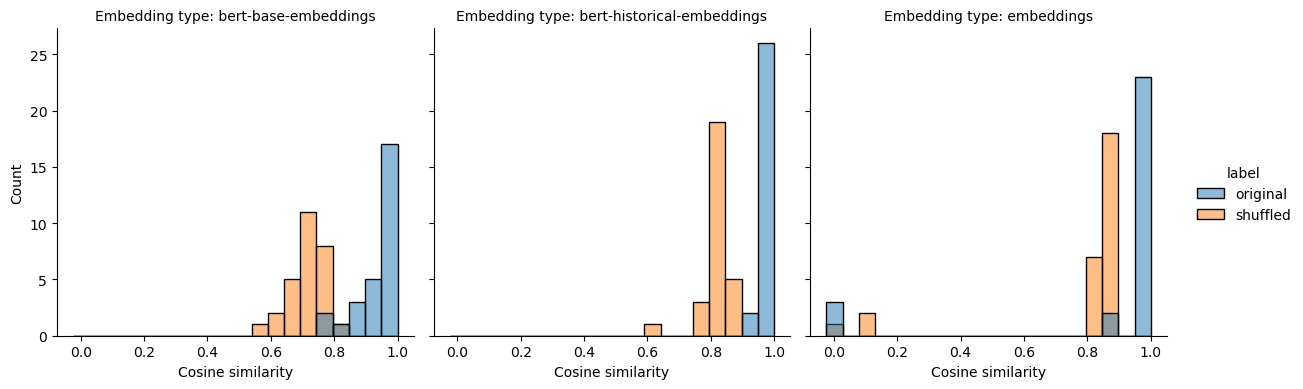

In [3]:
g = sns.displot(
    data=data,
    x="cosine_similarity",
    col="embedding_type",
    hue="label",
    bins=20,
    height=4,
)
g.set(xlabel="Cosine similarity")
g.set_titles("Embedding type: {col_name}")
plt.show()

In [4]:
def run_ttest(group: pd.Series) -> float:
    """Run a t-test for original and shuffled similarities."""
    orig = group.loc[group["label"]=="original", "cosine_similarity"]
    shuf = group.loc[group["label"]=="shuffled", "cosine_similarity"]
    test = stats.ttest_ind(shuf, orig)
    return test.pvalue


results = data.groupby("embedding_type").apply(run_ttest)

In [5]:
alpha = 0.05
print(
    f"Null hypothesis: randomly shuffled sentence similarities have the same average"
    f"\nas the original similarities\nReject?",
)
for name, pval in zip(results.index, results):
    print(f"{name}: {pval < alpha} (p = {pval:.4f})")

Null hypothesis: randomly shuffled sentence similarities have the same average
as the original similarities
Reject?
bert-base-embeddings: True (p = 0.0000)
bert-historical-embeddings: True (p = 0.0000)
embeddings: False (p = 0.1569)
